In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 100)
os.chdir('C:\\Users\\Documentos\\Documents\\Estudos\\C4')
nh = 3

In [3]:
print('assessments')
assessments = pd.read_csv('assessments.csv')
print(assessments.head(1))
print(assessments.info())
print(assessments.describe())

assessments
  code_module code_presentation  id_assessment assessment_type  date  weight
0         AAA             2013J           1752             TMA  19.0    10.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None
       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     2

In [4]:
print('courses')
courses = pd.read_csv('courses.csv')
print(courses.head(1))
print(courses.info())
print(courses.describe())

courses
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None
       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000


In [5]:
print('studentAssessment')
studentAssessment = pd.read_csv('studentAssessment.csv')
print(studentAssessment.head(1))
print(studentAssessment.info())
print(studentAssessment.describe())

studentAssessment
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.

In [6]:
print('studentInfo')
studentInfo = pd.read_csv('studentInfo.csv')
print(studentInfo.head(1))
print(studentInfo.info())
print(studentInfo.describe())

studentInfo
  code_module code_presentation  id_student gender               region  \
0         AAA             2013J       11391      M  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   

  disability final_result  
0          N         Pass  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of

In [7]:
print('studentRegistration')
studentRegistration = pd.read_csv('studentRegistration.csv')
print(studentRegistration.head(1))
print(studentRegistration.info())
print(studentRegistration.describe())

studentRegistration
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   

   date_unregistration  
0                  NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None
         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.

In [8]:
print('studentVle')
studentVle = pd.read_csv('studentVle.csv')
print(studentVle.head(1))
print(studentVle.info())
print(studentVle.describe())

studentVle
  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB
None
         id_student       id_site          date     sum_click
count  1.065528e+07  1.065528e+07  1.065528e+07  1.065528e+07
mean   7.333336e+05  7.383234e+05  9.517400e+01  3.716946e+00
std    5.827060e+05  1.312196e+05  7.607130e+01  8.849047e+00
min    6.516000e+03  5.267210e+05 -2.500000e+01  1.000000e+00
25%    5.077430e+05  6.735190e+05  2.500000e+01  1.000000e+00
50%    5.882360e+05  7.300690e+05  8.600000e+01  2.000000e

In [9]:
print('vle')
vle = pd.read_csv('vle.csv')
print(vle.head(1))
print(vle.info())
print(vle.describe())

vle
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None
            id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.30

In [10]:
#Criando o 'atraso_submitted' para a análise de segmentação.
studentAssessment['date_lim'] = studentAssessment.merge(assessments[['id_assessment', 'date']], on = 'id_assessment', how = 'left')['date']
studentAssessment['atraso_submitted'] = studentAssessment['date_submitted'] - studentAssessment['date_lim']
print(studentAssessment.head(nh))

   id_assessment  id_student  date_submitted  is_banked  score  date_lim  \
0           1752       11391              18          0   78.0      19.0   
1           1752       28400              22          0   70.0      19.0   
2           1752       31604              17          0   72.0      19.0   

   atraso_submitted  
0              -1.0  
1               3.0  
2              -2.0  


In [11]:
#Número de dias em que o estudante acessou o sistema Vle
studentRegistration = studentRegistration.merge(
    studentVle.groupby(['code_module', 'code_presentation', 'id_student']).size().reset_index(name = 'dias_acessados'),
    on = ['code_module', 'code_presentation', 'id_student'], how = 'left')

#Número de materiais no module/presentation
studentRegistration = studentRegistration.merge(
    vle.groupby(['code_module', 'code_presentation'])['id_site'].apply(lambda x: len(x.unique())).reset_index(name = 'n_vleMateriais'),
    on = ['code_module', 'code_presentation'], how = 'left')

#Número de materiais utilizados pelo estudante
studentRegistration = studentRegistration.merge(
    studentVle.groupby(
        ['code_module', 'code_presentation', 'id_student'])['id_site'].apply(lambda x: len(x.unique())).reset_index(name = 'n_materiaisUsados'),
    on = ['code_module', 'code_presentation', 'id_student'], how = 'left')

#Proporcional de dias acessados em relação ao número de dias do módulo (Engajamento do Estudante)
studentRegistration = studentRegistration.merge(
    courses[['code_module', 'code_presentation', 'module_presentation_length']], on = ['code_module', 'code_presentation'], how = 'left')
studentRegistration['da_engajamento'] = 100 * studentRegistration['dias_acessados'] / studentRegistration['module_presentation_length']

#Proporcional de materiais consumidos em relação ao número de materiais disponibilizados no module/presentation
studentRegistration['vle_engajamento'] = 100 * studentRegistration['n_materiaisUsados'] / studentRegistration['n_vleMateriais']

studentRegistration.head(nh)

,code_module,code_presentation,id_student,date_registration,date_unregistration,dias_acessados,n_vleMateriais,n_materiaisUsados,module_presentation_length,da_engajamento,vle_engajamento
0,AAA,2013J,11391,-159.0,NaN,196.0,211,55.0,268,73.134328,26.066351
1,AAA,2013J,28400,-53.0,NaN,430.0,211,84.0,268,160.447761,39.810427
2,AAA,2013J,30268,-92.0,12.0,76.0,211,22.0,268,28.358209,10.426540


In [12]:
#Indivíduos em relação à habitos de antecedência/atraso nas submissões
studentInfo = studentInfo.merge(
    studentAssessment.merge(
        assessments[['id_assessment', 'code_module', 'code_presentation']], on = 'id_assessment', how = 'left').groupby(
        ['code_module', 'code_presentation', 'id_student'])['atraso_submitted'].mean().reset_index(name = 'mean_atrasoSubmitted'),
    on = ['code_module', 'code_presentation', 'id_student'], how = 'left')

#Indivíduos em relação à antecipação no registro
studentInfo = studentInfo.merge(
    studentRegistration[['code_module', 'code_presentation', 'id_student', 'date_registration']], 
    on = ['code_module', 'code_presentation', 'id_student'], how = 'left') 

#Indivíduos em relação ao seu engajamento
studentInfo = studentInfo.merge(
    studentRegistration[['code_module', 'code_presentation', 'id_student', 'da_engajamento', 'vle_engajamento']],
    on = ['code_module', 'code_presentation', 'id_student'], how = 'left')

print(studentInfo.head(nh))

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   

   studied_credits disability final_result  mean_atrasoSubmitted  \
0              240          N         Pass                  -1.8   
1               60          N         Pass                   0.0   
2               60          Y    Withdrawn                   NaN   

   date_registration  da_engajamento  vle_engajamento  
0             -159.0       73.134328        26.066351  
1              -53.0      160.447761 

<Figure size 720x3600 with 0 Axes>

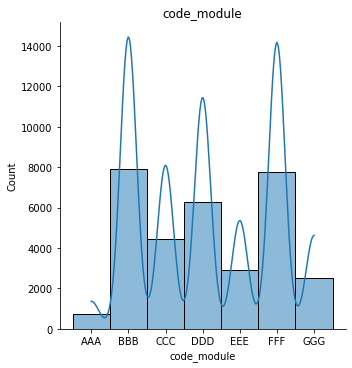

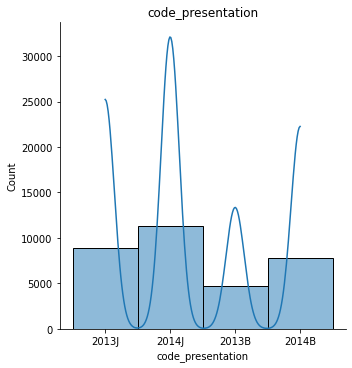

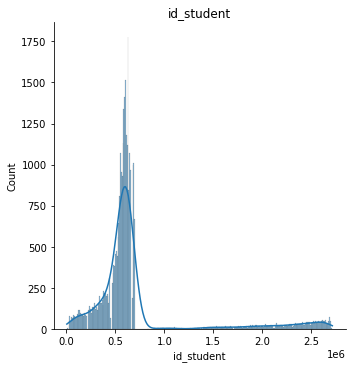

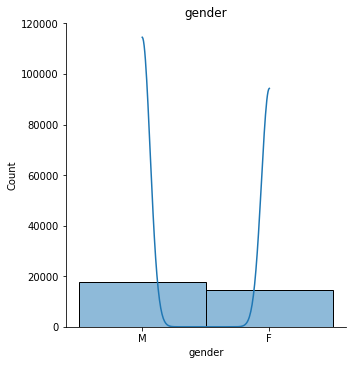

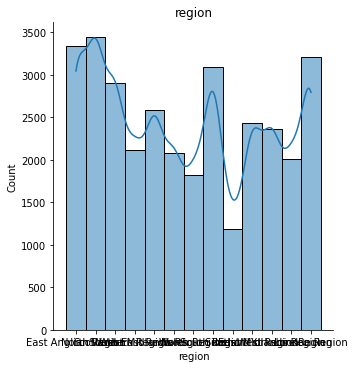

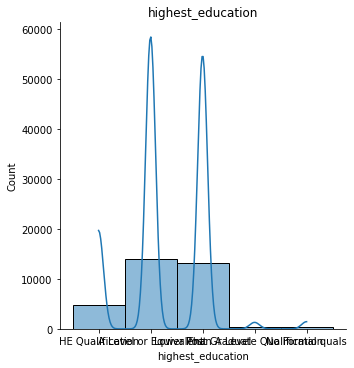

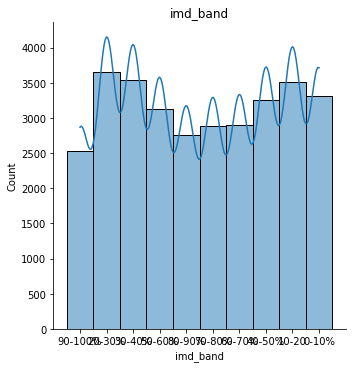

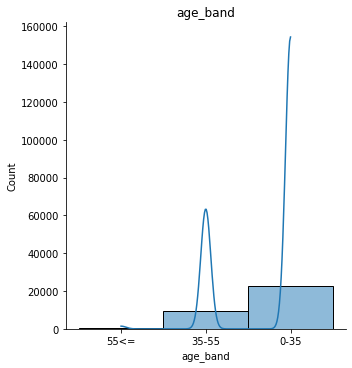

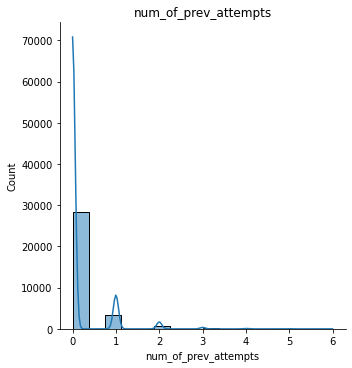

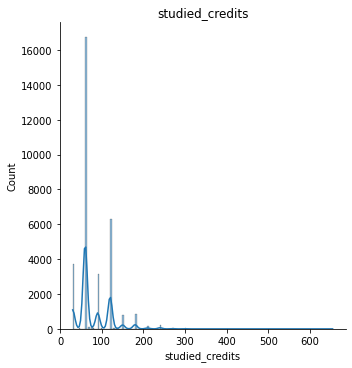

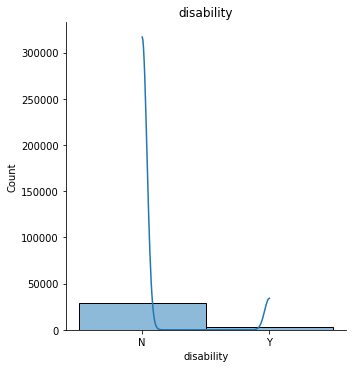

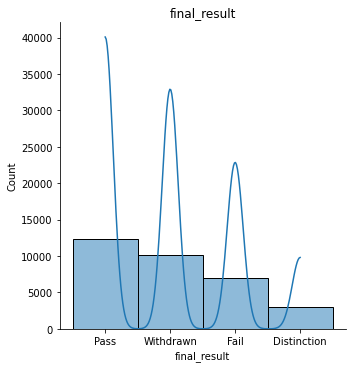

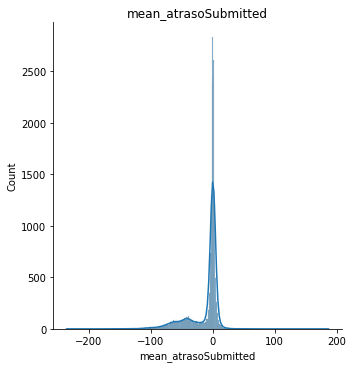

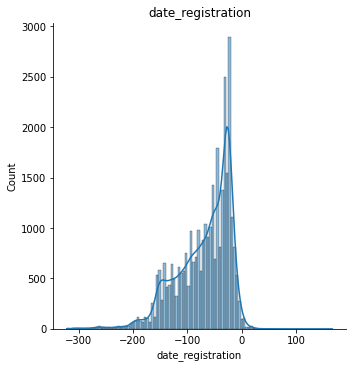

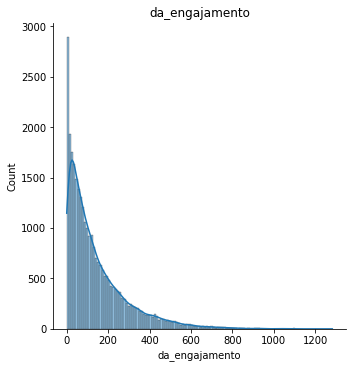

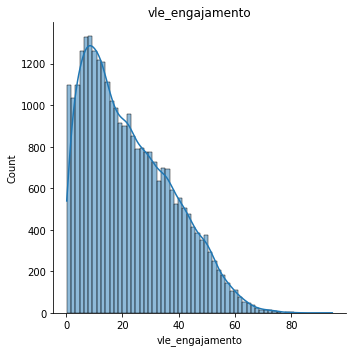

In [13]:
#Análise das distribuições
plt.figure(figsize = (10, 50))
for i in range(0, len(studentInfo.columns)):
    sns.displot(studentInfo[studentInfo.columns[i]], kde = True)
    plt.title(studentInfo.columns[i])
plt.tight_layout();

In [14]:
#Recode para o kmeans
studentInfo['int_gender'] = studentInfo['gender'].replace(['M', 'F'], [0, 1])
studentInfo['int_highest_education'] = studentInfo['highest_education'].replace(['A Level or Equivalent', 'Lower Than A Level', 'HE Qualification',
                                                   'No Formal quals', 'Post Graduate Qualification'], [2, 1, 3, 0, 4])
studentInfo['int_imd_band'] = studentInfo['imd_band'].replace(['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'], 
                                                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
studentInfo['int_age_band'] = studentInfo['age_band'].replace(['0-35', '35-55', '55<='], [0, 1, 2])
studentInfo['int_disability'] = studentInfo['disability'].replace(['N', 'Y'], [0, 1])

#"Dummyzação" do code_module (tentar captar diferenças entre os estudantes de diferentes módulos)
#Por falta de tempo vou optar em fazer a análise dos diferentes Presentations em conjunto (mesmo que tenha sido desaconselhado a seguir dessa forma)
ohe = OneHotEncoder()
data_cat = pd.DataFrame(ohe.fit_transform(studentInfo[['code_module']]).toarray())
data_cat.columns = 'module_' + studentInfo['code_module'].unique()
studentInfo = pd.concat([studentInfo, data_cat], axis = 1)

#Por não saber o significado do Distinction, vou desconsidera-lo
studentInfo['fResult_Pass'] = np.where(studentInfo['final_result'] == 'Pass', 1, 0)
studentInfo['fResult_Withdrawn'] = np.where(studentInfo['final_result'] == 'Withdrawn', 1, 0)
studentInfo['fResult_Fail'] = np.where(studentInfo['final_result'] == 'Fail', 1, 0)

print(studentInfo.head(nh))

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   

   studied_credits disability final_result  mean_atrasoSubmitted  \
0              240          N         Pass                  -1.8   
1               60          N         Pass                   0.0   
2               60          Y    Withdrawn                   NaN   

   date_registration  da_engajamento  vle_engajamento  int_gender  \
0             -159.0       73.134328        26.066351           0   
1          

In [15]:
#Variaveis para as análises seguintes
num_cols = ['num_of_prev_attempts', 'studied_credits', 'mean_atrasoSubmitted', 'date_registration', 'da_engajamento', 'vle_engajamento',
           'int_gender', 'int_highest_education', 'int_imd_band', 'int_age_band', 'int_disability', 'module_AAA', 'module_BBB',
           'module_CCC', 'module_DDD', 'module_EEE', 'module_FFF', 'module_GGG', 'fResult_Pass', 'fResult_Withdrawn', 'fResult_Fail']
studentInfo_num = studentInfo[num_cols].copy()

In [16]:
#Imputando o mean_atrasoSubmitted via regressão (muitos missings para ser via média ou para descartar os registros)
missing_flag = studentInfo[num_cols].apply(lambda x: not any(x.isna()), axis = 1)
quants = studentInfo['mean_atrasoSubmitted'].quantile([.01, .99]).tolist()
smooth_flag = studentInfo['mean_atrasoSubmitted'].between(quants[0], quants[1])
x = studentInfo.loc[missing_flag & smooth_flag, num_cols].drop('mean_atrasoSubmitted', axis = 1)
y = studentInfo['mean_atrasoSubmitted'].loc[missing_flag & smooth_flag]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

bm = np.mean([(studentInfo['mean_atrasoSubmitted'].mean() - val)**2 for val in y_test])
print(f'Benchmark: {bm}')

#print(studentInfo['mean_atrasoSubmitted'].describe())
#print((y_pred - y_test).describe())
#plt.scatter(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE lm: {mse}')

#Imputando as demais via média
for col in num_cols:
    if col != 'mean_atrasoSubmitted':
        studentInfo[col].fillna(studentInfo[col].mean(), inplace = True)

x = studentInfo.loc[studentInfo['mean_atrasoSubmitted'].isna(), num_cols].drop('mean_atrasoSubmitted', axis = 1)
studentInfo.loc[studentInfo['mean_atrasoSubmitted'].isna(), 'mean_atrasoSubmitted'] = lm.predict(x)

del bm, missing_flag, quants, smooth_flag, x, y, X_train, X_test, y_train, y_test, lm, y_pred, mse

Benchmark: 510.75621759686607
MSE lm: 240.6357835296435


In [17]:
#Recriando sem os missings
studentInfo_num = studentInfo[num_cols].copy() 

#log ~ Suavizar a distribuição
logmin_scale = abs(studentInfo_num.apply(min)) + 1
studentInfo_logscale = studentInfo_num.apply(lambda x: np.log(x + abs(x.min()) + 1)).copy()

#Após alguns testes:
kmeans_cols = ['num_of_prev_attempts', 'studied_credits', 'mean_atrasoSubmitted', 'da_engajamento', 'vle_engajamento', 'int_gender',
               'fResult_Pass', 'fResult_Withdrawn', 'fResult_Fail']
studentInfo_logscale = studentInfo_logscale[kmeans_cols]

#Rescaling
#scale = MinMaxScaler()
scale = StandardScaler()
studentInfo_scaled = scale.fit_transform(studentInfo_logscale)
studentInfo_scaled = pd.DataFrame(studentInfo_scaled, columns = studentInfo_logscale.columns)
studentInfo_scaled.describe()

,num_of_prev_attempts,studied_credits,mean_atrasoSubmitted,da_engajamento,vle_engajamento,int_gender,fResult_Pass,fResult_Withdrawn,fResult_Fail
count,3.259300e+04,3.259300e+04,3.259300e+04,3.259300e+04,3.259300e+04,3.259300e+04,3.259300e+04,3.259300e+04,3.259300e+04
mean,2.790460e-17,-2.204464e-15,-4.548450e-15,2.720699e-16,-1.464992e-16,6.976151e-17,-3.313672e-17,5.580920e-17,-1.918441e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-3.682294e-01,-1.640877e+00,-3.746207e+01,-3.128761e+00,-3.260154e+00,-9.074054e-01,-7.816411e-01,-6.727891e-01,-5.254570e-01
25%,-3.682294e-01,-4.236007e-01,-9.075444e-03,-5.230805e-01,-5.580194e-01,-9.074054e-01,-7.816411e-01,-6.727891e-01,-5.254570e-01
50%,-3.682294e-01,-4.236007e-01,3.667396e-01,2.569989e-01,3.106713e-01,-9.074054e-01,-7.816411e-01,-6.727891e-01,-5.254570e-01
75%,-3.682294e-01,1.117588e+00,4.322712e-01,6.438040e-01,7.203207e-01,1.102043e+00,1.279360e+00,1.486350e+00,-5.254570e-01
max,6.668394e+00,5.723920e+00,4.407008e+00,2.218023e+00,2.077219e+00,1.102043e+00,1.279360e+00,1.486350e+00,1.903105e+00


Text(0, 0.5, 'WCSS')

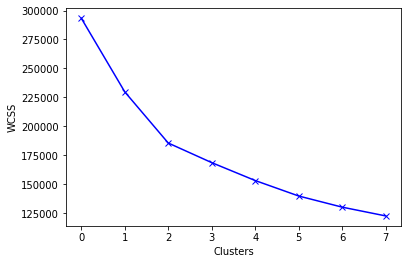

In [18]:
#KMeans -> Elbow Method
wcss = []
for i in range(1, len(studentInfo_scaled.columns)):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(studentInfo_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [19]:
#Após uma série de testes:
nclusters = 5
studentInfo_scaled = studentInfo_scaled[kmeans_cols]
kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(studentInfo_scaled)
labels = kmeans.labels_
np.unique(labels, return_counts = True)

#Centers
cluster_centers = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_), columns = studentInfo_scaled.columns)
for i in cluster_centers.columns:
    cluster_centers[i] = np.exp(cluster_centers[i]) - logmin_scale[i]

print(cluster_centers.head(nclusters))

   num_of_prev_attempts  studied_credits  mean_atrasoSubmitted  \
0              0.000080        81.692875             -7.278018   
1              0.004819        66.008057             -8.384748   
2              0.033907        69.354394            -18.848226   
3              0.031295        64.787201            -11.538856   
4              1.255610        97.230942            -21.154606   

   da_engajamento  vle_engajamento    int_gender  fResult_Pass  \
0       44.041427        11.081904  3.548833e-01  1.594852e-04   
1       46.181249        12.224616  3.508315e-01 -1.221245e-15   
2      198.946591        31.734600  5.773160e-15  7.462897e-01   
3      132.146077        25.031007  1.000000e+00  7.481978e-01   
4       49.065416        10.143453  3.935723e-01  1.165275e-01   

   fResult_Withdrawn  fResult_Fail  
0       9.950625e-01 -8.881784e-16  
1       8.437695e-15  9.995193e-01  
2       8.755689e-04  1.750525e-04  
3       3.082042e-04  1.998401e-15  
4       3.448237e-01 

0    0.000080
1    0.004819
2    0.033907
3    0.031295
4    1.255610
Name: num_of_prev_attempts, dtype: float64
count    32593.000000
mean         0.163225
std          0.479758
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: num_of_prev_attempts, dtype: float64


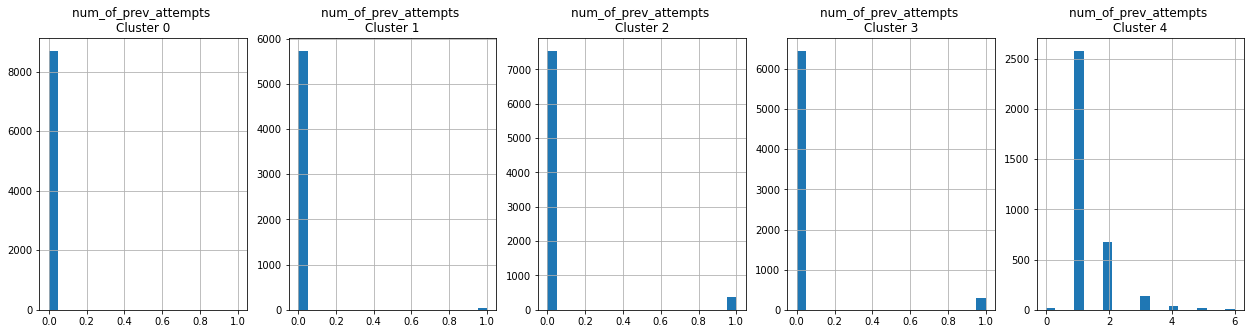

0    81.692875
1    66.008057
2    69.354394
3    64.787201
4    97.230942
Name: studied_credits, dtype: float64
count    32593.000000
mean        79.758691
std         41.071900
min         30.000000
25%         60.000000
50%         60.000000
75%        120.000000
max        655.000000
Name: studied_credits, dtype: float64


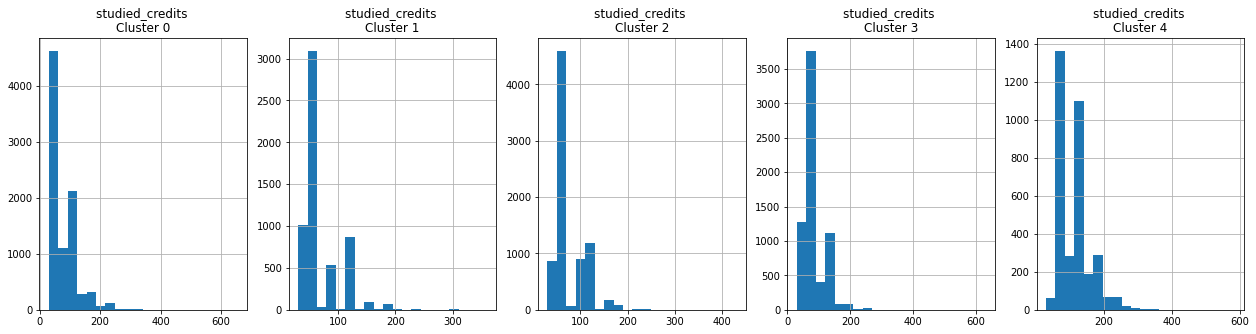

0    -7.278018
1    -8.384748
2   -18.848226
3   -11.538856
4   -21.154606
Name: mean_atrasoSubmitted, dtype: float64
count    32593.000000
mean       -10.913566
std         24.432637
min       -236.000000
25%        -13.000000
50%         -0.500000
75%          1.750000
max        187.000000
Name: mean_atrasoSubmitted, dtype: float64


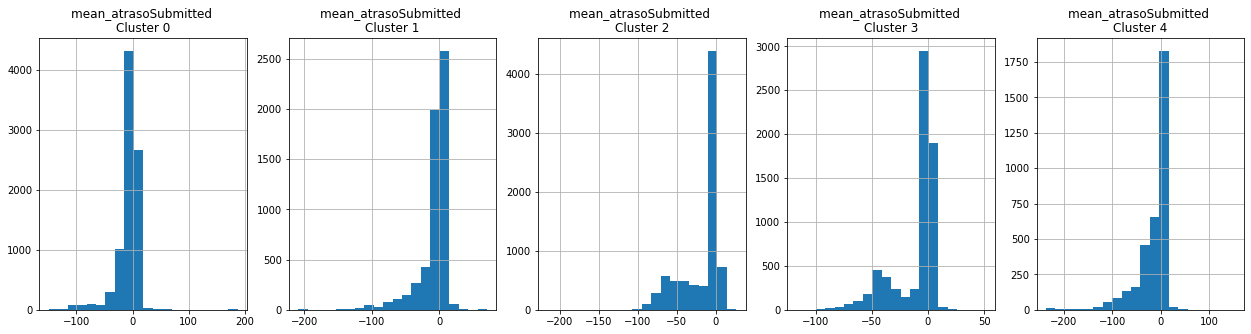

0     44.041427
1     46.181249
2    198.946591
3    132.146077
4     49.065416
Name: da_engajamento, dtype: float64
count    32593.000000
mean       142.498404
std        140.127862
min          0.371747
25%         42.145594
50%        112.643678
75%        182.442748
max       1282.500000
Name: da_engajamento, dtype: float64


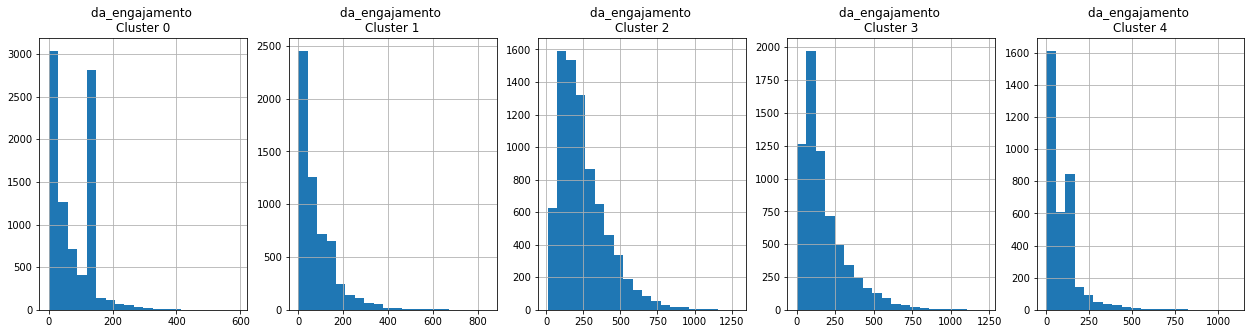

0    11.081904
1    12.224616
2    31.734600
3    25.031007
4    10.143453
Name: vle_engajamento, dtype: float64
count    32593.000000
mean        22.431525
std         14.673951
min          0.189036
25%         10.610932
50%         22.345133
75%         31.400966
max         94.618834
Name: vle_engajamento, dtype: float64


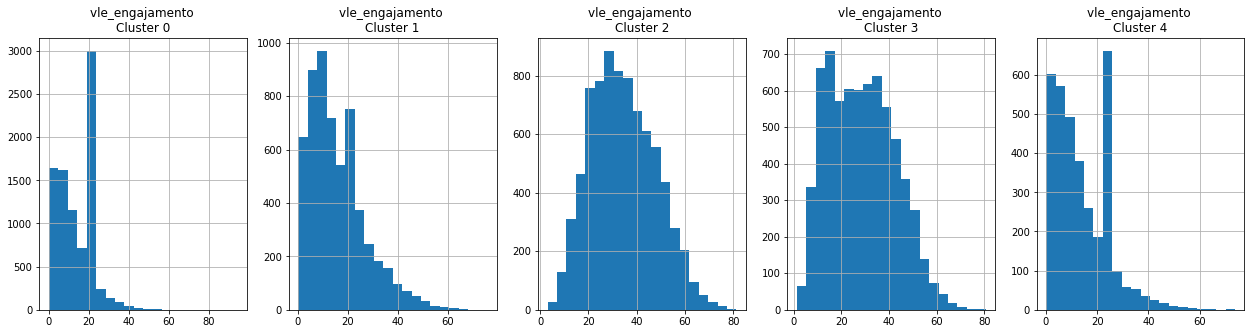

0    3.548833e-01
1    3.508315e-01
2    5.773160e-15
3    1.000000e+00
4    3.935723e-01
Name: int_gender, dtype: float64
count    32593.000000
mean         0.451569
std          0.497657
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: int_gender, dtype: float64


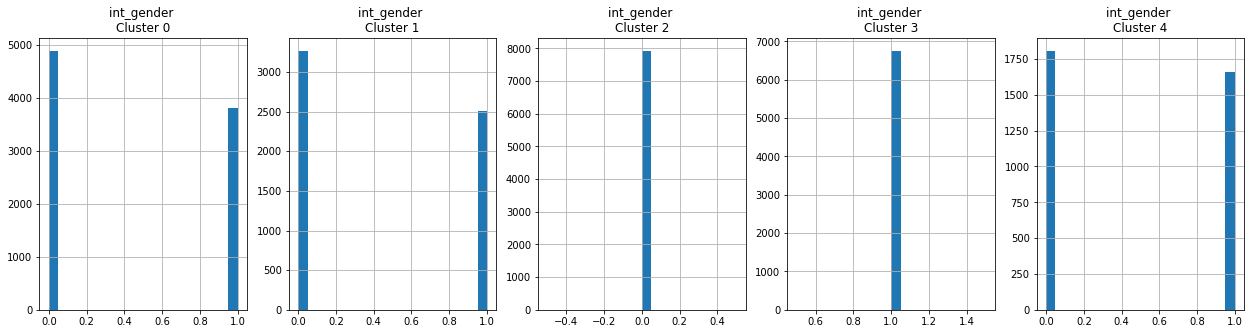

0    1.594852e-04
1   -1.221245e-15
2    7.462897e-01
3    7.481978e-01
4    1.165275e-01
Name: fResult_Pass, dtype: float64
count    32593.000000
mean         0.379253
std          0.485209
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: fResult_Pass, dtype: float64


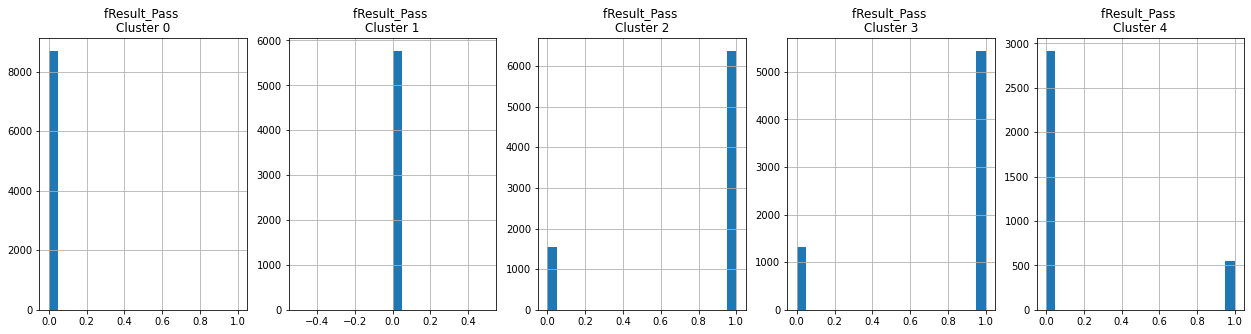

0    9.950625e-01
1    8.437695e-15
2    8.755689e-04
3    3.082042e-04
4    3.448237e-01
Name: fResult_Withdrawn, dtype: float64
count    32593.000000
mean         0.311601
std          0.463155
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: fResult_Withdrawn, dtype: float64


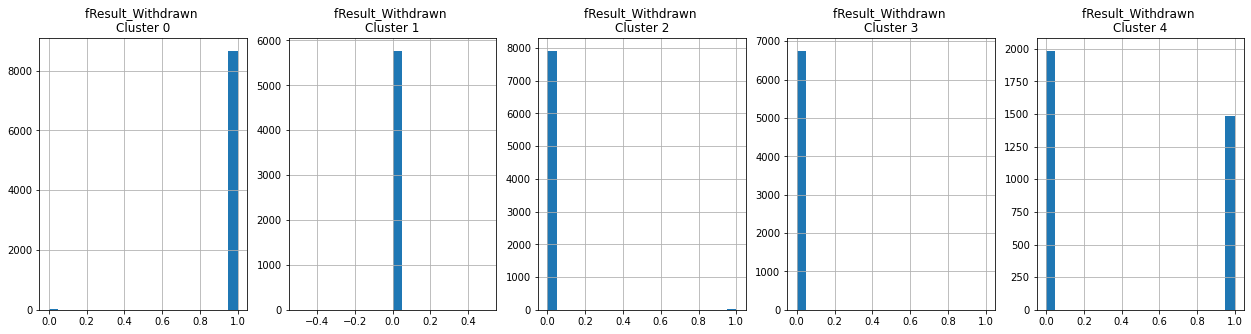

0   -8.881784e-16
1    9.995193e-01
2    1.750525e-04
3    1.998401e-15
4    2.931157e-01
Name: fResult_Fail, dtype: float64
count    32593.000000
mean         0.216365
std          0.411773
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fResult_Fail, dtype: float64


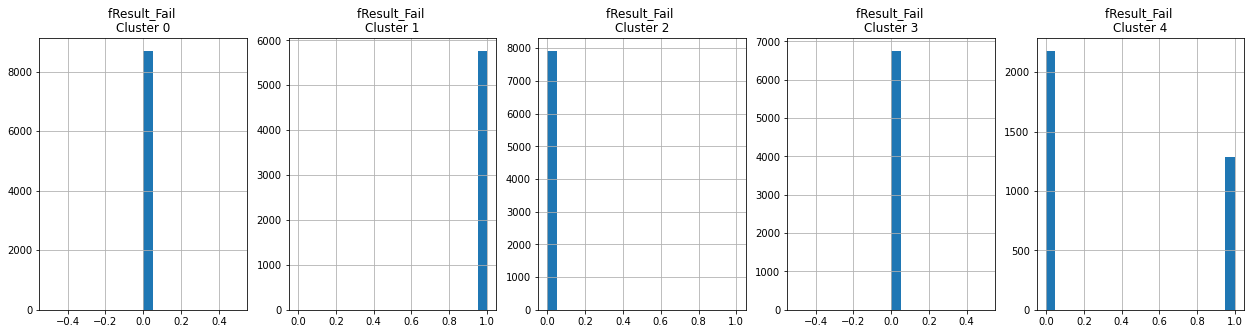

In [20]:
studentInfo_num['labels'] = labels
for i in studentInfo_scaled.columns:
    print(cluster_centers[i])
    print(studentInfo_num[i].describe())
    plt.figure(figsize = (35, 5))
    for j in range(nclusters):
        plt.subplot(1, 8, j + 1)
        cluster = studentInfo_num[studentInfo_num['labels'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [21]:
#n_cluster = 5, com logscale e Standard rescale. (Melhor resultado dentre ncluster 2~7, com e sem logscale, e usando MinMax e Standard rescale)
print(pd.DataFrame({'cluster' : range(0, 5), 
                    'num_of_prev_attempts' : ['alto', 'baixo', 'baixo', 'zero', 'baixo'], 
                    'studied_credits' : ['maior', 'baixo', 'baixo', 'alto', 'baixo'], 
                    'mean_atrasoSubmitted' : ['baixo', 'alto', 'medio', 'alto', 'baixo'], 
                    'da_engajamento' : ['baixo', 'baixo', 'medio', 'baixo', 'maior'], 
                    'vle_engajamento' : ['menor', 'baixo', 'alto', 'baixo', 'maior'], 
                    'int_gender' : ['medio', 'medio', 'maior', 'medio', 'menor'], 
                    'fResult_Pass' : ['baixo', 'zero', 'alto', 'baixo', 'alto'], 
                    'fResult_Withdrawn' : ['medio', 'zero', 'baixo', 'um', 'baixo'], 
                    'fResult_Fail' : ['medio', 'um', 'zero', 'zero', 'baixo']}))

   cluster num_of_prev_attempts studied_credits mean_atrasoSubmitted  \
0        0                 alto           maior                baixo   
1        1                baixo           baixo                 alto   
2        2                baixo           baixo                medio   
3        3                 zero            alto                 alto   
4        4                baixo           baixo                baixo   

  da_engajamento vle_engajamento int_gender fResult_Pass fResult_Withdrawn  \
0          baixo           menor      medio        baixo             medio   
1          baixo           baixo      medio         zero              zero   
2          medio            alto      maior         alto             baixo   
3          baixo           baixo      medio        baixo                um   
4          maior           maior      menor         alto             baixo   

  fResult_Fail  
0        medio  
1           um  
2         zero  
3         zero  
4        baix

Grupo 0: O grupo zero possui majoritariamente estudantes com um histórico de tentativas anteriores, que tendem a fazer mais módulos em paralelo, refletindo em um engajamento menor quando olhamos individualmente para cada módulo, o que acaba por diminuir suas chances de passar nos módulos em questão, enquanto implica em uma chance média do estudante optar pelo Withdrawn, ou falhar no módulo.

Grupo 1: O grupo um possui em sua grande maioria, estudantes sem, ou com poucas tentativas passadas nos módulos, que tendem a fazer poucos módulos em paralelo, mas que costumam submeter suas avaliações no prazo limite, o que possivelmente seja um reflexo de seu baixo engajamento nos módulos, além de ser quase totalmente preenchido por estudantes que tendem a falhar nos módulos em que estão.

Grupo 3: O grupo três possui em sua grande maioria, estudantes sem, ou com poucas tentativas passadas nos módulos, que tendem a fazer muitos módulos em paralelo, e que costumam submeter suas avaliações no prazo limite, o que possivelmente seja um reflexo de seu baixo engajamento nos módulos, além de ser quase totalmente preenchido por estudantes que tendem a dar withdraw nos módulos em que estão, provavelmente por não poderem focar em módulos específicos, uma vez que fazem vários módulos ao mesmo tempo.

Grupos 2 e 4: Os grupos dois e quatro enquadram em sua grande maioria estudantes sem tentativas anteriores nos módulos, que tendem a fazer poucos módulos em paralelo, que costumam submeter suas avaliações com bastante antecedência em relação ao prazo final, sendo os grupos com maior engajamento nos módulos, com o grupo 4 sendo formado majoritamente por homens, que tendem a ter uma leve vantagem de engajamento em relação às mulheres, que por sua vez são maioria no grupo 3 e que tendem a levar vantagem em relação aos homens nas chances de não falharem no módulo. Ambos os grupos possuem uma alta probabilidade de passarem nos módulos em questão.

In [22]:
#Analisando fatores associados ao desempenho (optei por utilizar regressão com o studentAssessment.score ao invés do studentInfo.final_result via classificação)
studentInfo = studentInfo.merge(
    studentAssessment.merge(
        assessments[['id_assessment', 'code_module', 'code_presentation']], on = 'id_assessment', how = 'left').groupby(
        ['code_module', 'code_presentation', 'id_student'])['score'].mean().reset_index(name = 'mean_score'),
    on = ['code_module', 'code_presentation', 'id_student'], how = 'left')

num_cols.append('mean_score')
studentInfo_num = studentInfo[num_cols].copy()
studentInfo_num.drop(['date_registration', 'int_disability', 
                      'module_AAA', 'module_BBB', 'module_CCC', 'module_DDD', 'module_EEE', 'module_FFF', 'module_GGG', 
                      'fResult_Pass', 'fResult_Withdrawn', 'fResult_Fail'], axis = 1, inplace = True)
studentInfo_num = studentInfo_num.loc[studentInfo_num['mean_score'].notnull(), :]
print(studentInfo_num.head(nh))

   num_of_prev_attempts  studied_credits  mean_atrasoSubmitted  \
0                     0              240                  -1.8   
1                     0               60                   0.0   
3                     0               60                  -2.0   

   da_engajamento  vle_engajamento  int_gender  int_highest_education  \
0       73.134328        26.066351           0                      3   
1      160.447761        39.810427           1                      3   
3      247.388060        38.862559           1                      2   

   int_imd_band  int_age_band  mean_score  
0           9.0             2        82.0  
1           2.0             1        66.4  
3           5.0             1        76.0  


In [23]:
#OneHotEncoding (highest_education e age_band, optei por manter o int_imd_band)
ohe = OneHotEncoder()
data_cat1 = pd.DataFrame(ohe.fit_transform(studentInfo_num[['int_highest_education']]).toarray(),
                         columns = ['highest_education_0', 'highest_education_1', 'highest_education_2', 'highest_education_3', 'highest_education_4']).iloc[:, 1:5]

data_cat2 = pd.DataFrame(ohe.fit_transform(studentInfo_num[['int_age_band']]).toarray(),
                         columns = ['age_band_0', 'age_band_1', 'age_band_2']).iloc[:, 1:3]

studentInfo_num.drop(['int_highest_education', 'int_age_band'], axis = 1, inplace = True)
studentInfo_num = pd.concat([studentInfo_num.reset_index(drop = True), data_cat1, data_cat2], axis = 1)
studentInfo_num.head(nh)

,num_of_prev_attempts,studied_credits,mean_atrasoSubmitted,da_engajamento,vle_engajamento,int_gender,int_imd_band,mean_score,highest_education_1,highest_education_2,highest_education_3,highest_education_4,age_band_1,age_band_2
0,0,240,-1.8,73.134328,26.066351,0,9.0,82.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,60,0.0,160.447761,39.810427,1,2.0,66.4,0.0,0.0,1.0,0.0,1.0,0.0
2,0,60,-2.0,247.388060,38.862559,1,5.0,76.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
#Multicolinearidade
vif_data = pd.DataFrame()
vif_data["feature"] = studentInfo_num.drop('mean_score', axis = 1).columns
vif_data["VIF"] = [variance_inflation_factor(studentInfo_num.drop('mean_score', axis = 1).values, i)
                          for i in range(len(studentInfo_num.drop('mean_score', axis = 1).columns))]
  
print(vif_data)
studentInfo_num.corr().head(14)

                 feature       VIF
0   num_of_prev_attempts  1.186521
1        studied_credits  5.269370
2   mean_atrasoSubmitted  1.353976
3         da_engajamento  4.151876
4        vle_engajamento  6.919234
5             int_gender  1.867413
6           int_imd_band  3.561456
7    highest_education_1  5.215114
8    highest_education_2  6.266331
9    highest_education_3  3.040813
10   highest_education_4  1.162832
11            age_band_1  1.523240
12            age_band_2  1.037034


,num_of_prev_attempts,studied_credits,mean_atrasoSubmitted,da_engajamento,vle_engajamento,int_gender,int_imd_band,mean_score,highest_education_1,highest_education_2,highest_education_3,highest_education_4,age_band_1,age_band_2
num_of_prev_attempts,1.000000,0.185663,-0.057373,-0.077865,-0.167303,0.025668,-0.043345,-0.071600,0.038702,-0.016786,-0.030663,-0.003756,0.010769,-0.011879
studied_credits,0.185663,1.000000,0.002562,0.023311,-0.165030,-0.029704,-0.034650,-0.070878,-0.040016,0.041060,0.003496,-0.025761,-0.080486,-0.014994
mean_atrasoSubmitted,-0.057373,0.002562,1.000000,-0.285688,-0.107033,0.118757,-0.011143,-0.197600,-0.053577,0.025664,0.036314,0.006501,-0.027958,0.003009
da_engajamento,-0.077865,0.023311,-0.285688,1.000000,0.644452,-0.136477,0.075597,0.318706,-0.056857,-0.005375,0.080041,0.027829,0.134146,0.064684
vle_engajamento,-0.167303,-0.165030,-0.107033,0.644452,1.000000,-0.124202,0.094568,0.331327,-0.070818,-0.016165,0.106841,0.055756,0.158996,0.065139
int_gender,0.025668,-0.029704,0.118757,-0.136477,-0.124202,1.000000,-0.080075,0.006470,0.039909,0.006295,-0.060099,-0.032016,0.044646,-0.053097
int_imd_band,-0.043345,-0.034650,-0.011143,0.075597,0.094568,-0.080075,1.000000,0.112800,-0.081754,0.029514,0.072724,0.048158,0.048942,0.066631
mean_score,-0.071600,-0.070878,-0.197600,0.318706,0.331327,0.006470,0.112800,1.000000,-0.095064,0.039958,0.067284,0.057140,0.065944,0.020688
highest_education_1,0.038702,-0.040016,-0.053577,-0.056857,-0.070818,0.039909,-0.081754,-0.095064,1.000000,-0.702265,-0.335371,-0.081988,0.011699,-0.041359
highest_education_2,-0.016786,0.041060,0.025664,-0.005375,-0.016165,0.006295,0.029514,0.039958,-0.702265,1.000000,-0.382732,-0.093566,-0.104976,-0.046768


                            OLS Regression Results                            
Dep. Variable:             mean_score   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     472.8
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        04:47:59   Log-Likelihood:            -1.0645e+05
No. Observations:               25820   AIC:                         2.129e+05
Df Residuals:                   25808   BIC:                         2.130e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   55.8284 

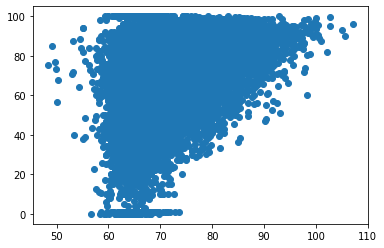


Influencia
Influencia const: 55.83 / 55.83
Influencia num_of_prev_attempts: -0.0 / -0.82
Influencia studied_credits: -0.4 / -1.61
Influencia mean_atrasoSubmitted: 4.93 / -0.3
Influencia da_engajamento: 0.39 / 5.43
Influencia vle_engajamento: 1.67 / 10.76
Influencia int_gender: 0.0 / 2.66
Influencia int_imd_band: 0.44 / 3.51
Influencia highest_education_1: 0.0 / 4.09
Influencia highest_education_2: 0.0 / 6.56
Influencia highest_education_3: 0.0 / 7.18
Influencia highest_education_4: 0.0 / 0.0


In [25]:
#Análise de fatores associados via Reg Linear
studentInfo_num = sm.add_constant(studentInfo_num, prepend = True)
model = sm.OLS(studentInfo_num['mean_score'], studentInfo_num.drop(['mean_score', 'age_band_1', 'age_band_2'], axis = 1)).fit()

#Problema na distribuição dos resíduos, uma análise mais detalhada e com mais tempo seria necessária, uma vez que o atual índice de multilinearidade não explica essa não-aleatoriedade dos resíduos.
print(model.summary())

print('\nResíduos')
print((model.predict() - studentInfo_num['mean_score']).describe())
plt.scatter(model.predict(), studentInfo_num['mean_score'])
plt.show()

print('\nInfluencia')
for i, col in enumerate(studentInfo_num.drop(['mean_score', 'age_band_1', 'age_band_2'], axis = 1)):
    print(f'Influencia {col}: {np.round(model.params[i] * studentInfo_num[col].quantile(0.1), 2)} / {np.round(model.params[i] * studentInfo_num[col].quantile(0.9), 2)}')


Sugestões:

-Iniciando pela análise de agrupamento, o baixo engajamento (assim como o baixo rendimento) do G0 talvez possa ser explicado por uma sobrecarga de módulos, uma vez que se trata de um grupo de indivíduos com várias tentativas passadas e uma alta carga de módulos em paralelo, mas que tende a submeter suas avaliações com antecedência (talvez por poder reaproveitar suas avaliações passadas).
 Dentre os grupos de baixo rendimento, o G3 é o que se aproxima mais do G0, uma vez que se trata de um grupo com uma alta carga de módulos em paralelo, mas que submete suas avaliações no tempo limite, uma vez que de forma geral não podem reaproveitar suas avaliações por não possuirem tentativas anteriores.
 Para ambos os grupos, minha sugestão seria intervenções no sentido de diminuir a carga de conteúdo que esses estudantes possuem, podendo assim, concentrar de forma mais específica seus esforços em um número menor de módulos.
 
-Em relação ao G1, por se tratar de um grupo com baixa carga de conteúdo, que faz suas submissões no tempo limite, e com baixo engajamento, podemos trabalhar inicialmente com duas hipóteses:
 1) Fatores externos no qual a instituição não possui influência.
 2) Baixo engajamento por falta de motivação.
 Caso em análises mais detalhadas seja constatado que se trata da segunda situação, minha sugestão seriam formas de incentivar esses estudantes em relação ao curso (principalmente no que se trata da utilização do sistema Vle).
 
-Sobre o desempenho geral dos estudantes, podemos notar através da análise anterior que fatores relacionados ao uso do sistema Vle possuem grande influência sobre o desempenho dos estudantes. Por conta disso, recomenda-se fortemente intervenções no sentido de incentivar os estudantes a utilizar o sistema com mais frequência, assim como consumir os diversos materiais disponibilizados no mesmo.
